In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency,ttest_ind

df = pd.DataFrame(pd.read_csv('/content/vehicle.csv'))
df = df.drop('PolicyNumber',axis=1)
df = df[df['MonthClaimed']!='0']
for name,data in df.iteritems():
  print(name)
  if data.dtype=='object':
    print(data.unique())
  else:
    print("Max:",max(data),"Min:",min(data))
  print()


Month
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']

WeekOfMonth
Max: 5 Min: 1

DayOfWeek
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

Make
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']

AccidentArea
['Urban' 'Rural']

DayOfWeekClaimed
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday']

MonthClaimed
['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct']

WeekOfMonthClaimed
Max: 5 Min: 1

Sex
['Female' 'Male']

MaritalStatus
['Single' 'Married' 'Widow' 'Divorced']

Age
Max: 80 Min: 0

Fault
['Policy Holder' 'Third Party']

PolicyType
['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'
 'Utility - All Perils' 'Sedan - All Perils' 'Sedan - Collision'
 'Utility - Collision' 'Utility - Liability' 'Sport - All Perils']

VehicleCategory
['Sport' 'Utility' 'Sedan']

Veh

<ipython-input-2-84a63edeac43>:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name,data in df.iteritems():


In [3]:
fraud = df[df['FraudFound_P']==1]
nofraud = df[df['FraudFound_P']==0]

nofraud = nofraud[:1000]

newdf = pd.concat([fraud, nofraud], ignore_index=True)

In [4]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 1923 non-null   object
 1   WeekOfMonth           1923 non-null   int64 
 2   DayOfWeek             1923 non-null   object
 3   Make                  1923 non-null   object
 4   AccidentArea          1923 non-null   object
 5   DayOfWeekClaimed      1923 non-null   object
 6   MonthClaimed          1923 non-null   object
 7   WeekOfMonthClaimed    1923 non-null   int64 
 8   Sex                   1923 non-null   object
 9   MaritalStatus         1923 non-null   object
 10  Age                   1923 non-null   int64 
 11  Fault                 1923 non-null   object
 12  PolicyType            1923 non-null   object
 13  VehicleCategory       1923 non-null   object
 14  VehiclePrice          1923 non-null   object
 15  FraudFound_P          1923 non-null   

In [5]:
df_majority = df[df['FraudFound_P'] == 0]
df_minority = df[df['FraudFound_P'] == 1]

# Oversample the minority class to match the number of majority class instances
df_minority_oversampled = df_minority.sample(n=len(df_majority), replace=True, random_state=42)

# Combine the oversampled minority class with the majority class
equaldf = pd.concat([df_majority, df_minority_oversampled])

# Shuffle the rows in the balanced DataFrame to randomize the order
equaldf = equaldf.sample(frac=1, random_state=42)

<ipython-input-6-760d68a13680>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name,data in equaldf.iteritems():


Month :


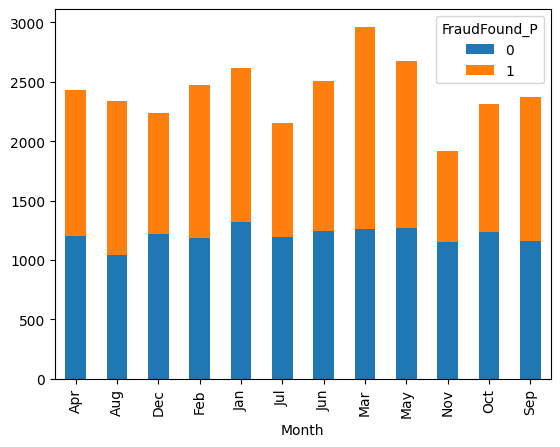

FraudFound_P          0          1
Month                             
Apr           49.362402  50.637598
Aug           44.610778  55.389222
Dec           54.720358  45.279642
Feb           47.877072  52.122928
Jan           50.669728  49.330272
Jul           55.627907  44.372093
Jun           49.501396  50.498604
Mar           42.456969  57.543031
May           47.571001  52.428999
Nov           60.124935  39.875065
Oct           53.463203  46.536797
Sep           49.010526  50.989474
Chi2 value: 10.593277605322635
p-values: 0.4779385392309917
WeekOfMonth :


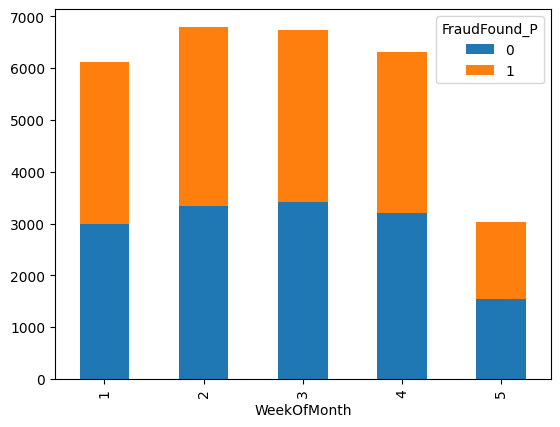

FraudFound_P          0          1
WeekOfMonth                       
1             48.839111  51.160889
2             49.014416  50.985584
3             50.793415  49.206585
4             50.784096  49.215904
5             51.158173  48.841827
Chi2 value: 0.1934125434165617
p-values: 0.9956147611310978
DayOfWeek :


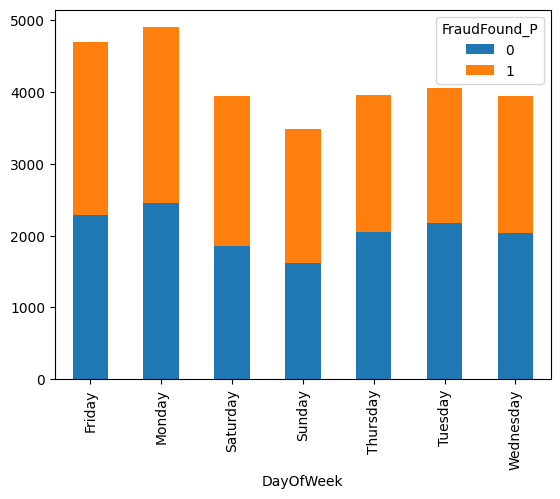

FraudFound_P          0          1
DayOfWeek                         
Friday        48.713587  51.286413
Monday        50.061175  49.938825
Saturday      46.847303  53.152697
Sunday        46.624533  53.375467
Thursday      51.895854  48.104146
Tuesday       53.813873  46.186127
Wednesday     51.773050  48.226950
Chi2 value: 1.770601418691638
p-values: 0.9395416347522293
Make :


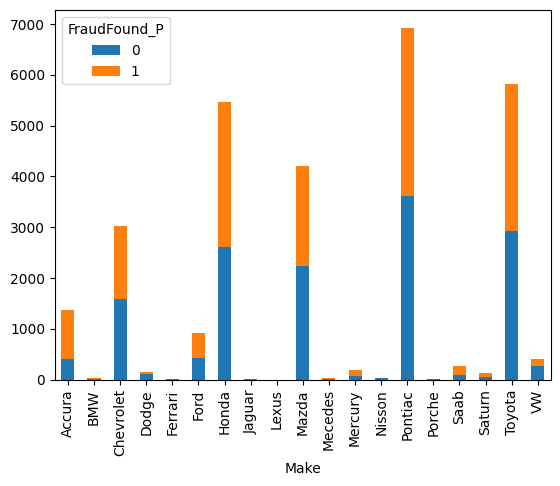

FraudFound_P           0          1
Make                               
Accura         30.145985  69.854015
BMW            53.846154  46.153846
Chevrolet      52.532274  47.467726
Dodge          75.886525  24.113475
Ferrari       100.000000   0.000000
Ford           44.983819  55.016181
Honda          47.880891  52.119109
Jaguar        100.000000   0.000000
Lexus         100.000000   0.000000
Mazda          53.068506  46.931494
Mecedes        13.636364  86.363636
Mercury        41.847826  58.152174
Nisson         70.731707  29.268293
Pontiac        52.279284  47.720716
Porche        100.000000   0.000000
Saab           36.466165  63.533835
Saturn         37.956204  62.043796
Toyota         50.377618  49.622382
VW             67.567568  32.432432
Chi2 value: 493.35792474020184
p-values: 2.59705848684742e-93
AccidentArea :


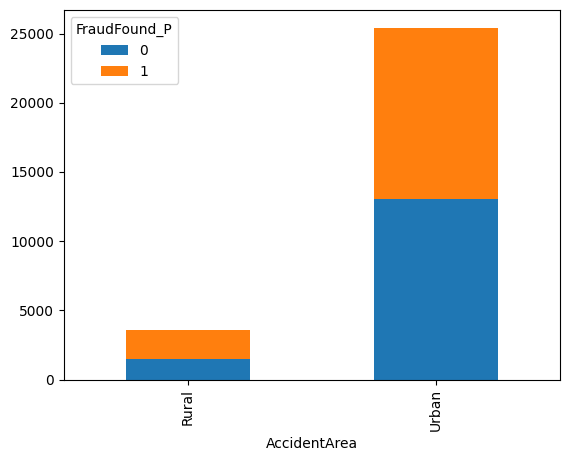

FraudFound_P          0          1
AccidentArea                      
Rural         41.135150  58.864850
Urban         51.240514  48.759486
Chi2 value: 1.667848344439359
p-values: 0.19654697898928586
DayOfWeekClaimed :


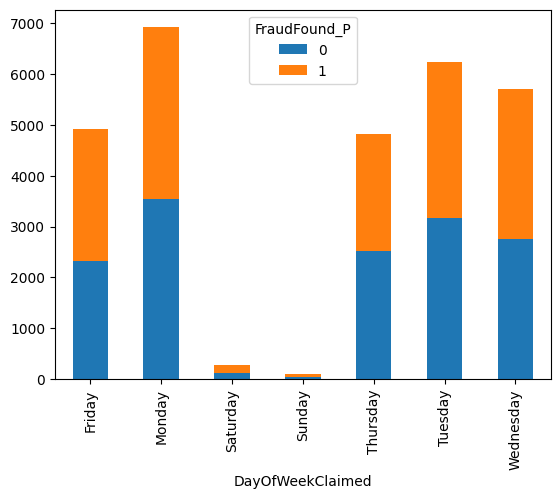

FraudFound_P              0          1
DayOfWeekClaimed                      
Friday            47.447631  52.552369
Monday            51.170520  48.829480
Saturday          41.489362  58.510638
Sunday            48.039216  51.960784
Thursday          52.112676  47.887324
Tuesday           50.962464  49.037536
Wednesday         48.397267  51.602733
Chi2 value: 3.071670693189243
p-values: 0.7997991563715537
MonthClaimed :


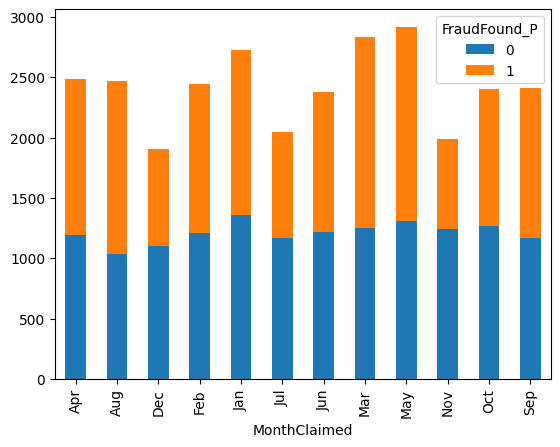

FraudFound_P          0          1
MonthClaimed                      
Apr           47.885622  52.114378
Aug           41.879303  58.120697
Dec           57.645822  42.354178
Feb           49.468085  50.531915
Jan           49.761117  50.238883
Jul           57.052221  42.947779
Jun           51.136364  48.863636
Mar           44.158136  55.841864
May           44.874871  55.125129
Nov           62.386707  37.613293
Oct           52.750000  47.250000
Sep           48.278723  51.721277
Chi2 value: 16.009447052894593
p-values: 0.14078052399970128
WeekOfMonthClaimed :


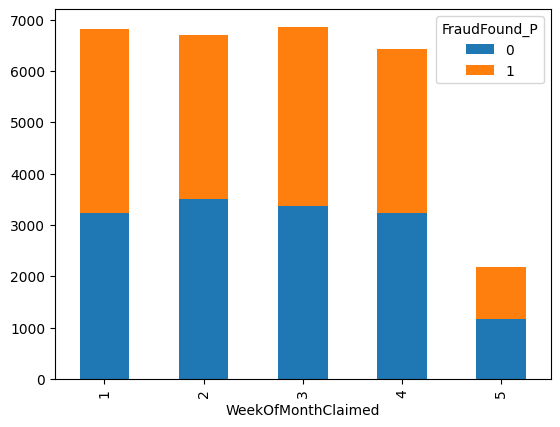

FraudFound_P                0          1
WeekOfMonthClaimed                      
1                   47.352984  52.647016
2                   52.433562  47.566438
3                   49.023039  50.976961
4                   50.124378  49.875622
5                   53.501144  46.498856
Chi2 value: 0.9989308181066414
p-values: 0.9099580691108443
Sex :


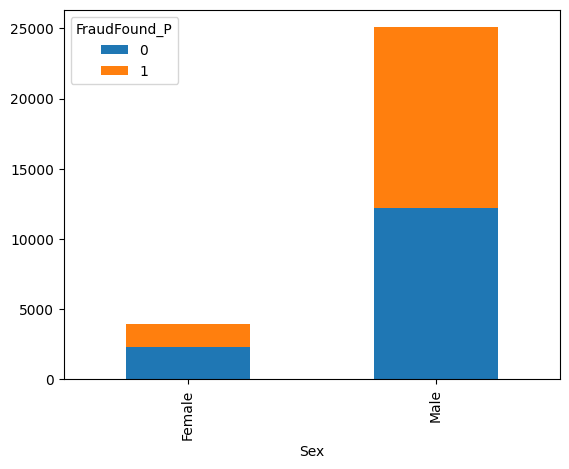

FraudFound_P          0          1
Sex                               
Female        59.071192  40.928808
Male          48.582140  51.417860
Chi2 value: 1.8114522673575308
p-values: 0.1783341149173891
MaritalStatus :


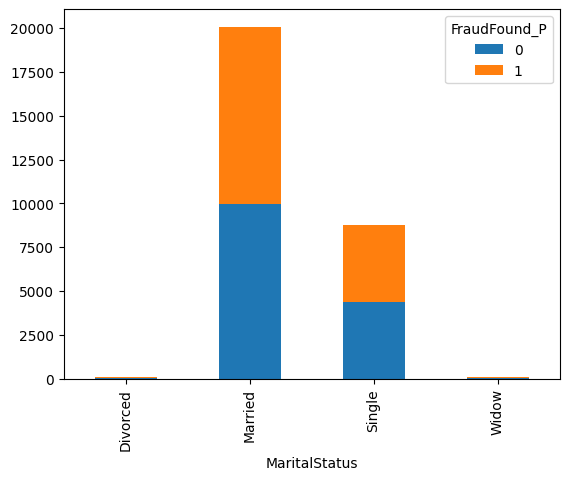

FraudFound_P           0          1
MaritalStatus                      
Divorced       63.478261  36.521739
Married        49.780658  50.219342
Single         50.400458  49.599542
Widow          41.558442  58.441558
Chi2 value: 9.859730763585265
p-values: 0.019796890112196593
Fault :


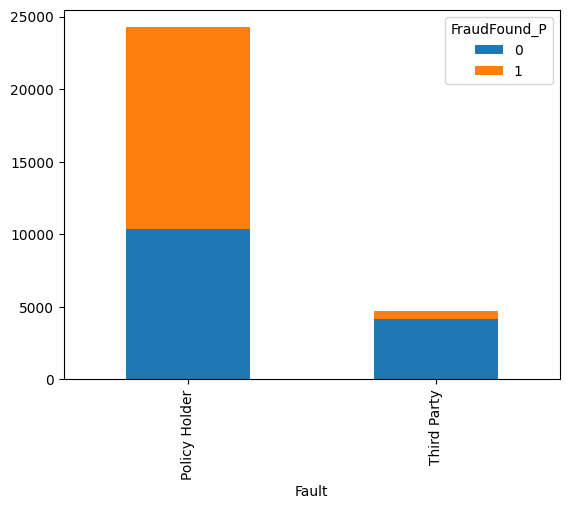

FraudFound_P           0          1
Fault                              
Policy Holder  42.625180  57.374820
Third Party    87.856992  12.143008
Chi2 value: 43.13721222591546
p-values: 5.103235128961392e-11
PolicyType :


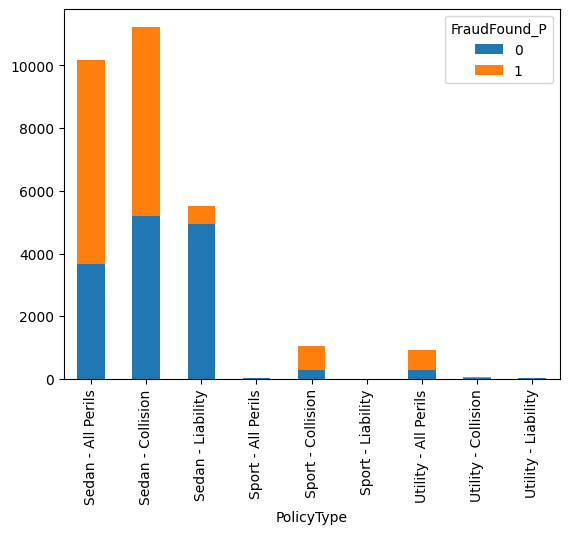

FraudFound_P                   0          1
PolicyType                                 
Sedan - All Perils     36.164141  63.835859
Sedan - Collision      46.325167  53.674833
Sedan - Liability      89.920087  10.079913
Sport - All Perils    100.000000   0.000000
Sport - Collision      28.382214  71.617786
Sport - Liability     100.000000   0.000000
Utility - All Perils   32.429501  67.570499
Utility - Collision    35.526316  64.473684
Utility - Liability   100.000000   0.000000
Chi2 value: 374.7909150616298
p-values: 4.594981089380565e-76
VehicleCategory :


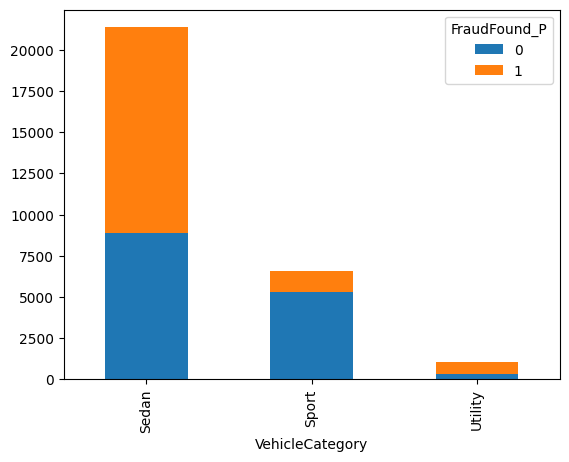

FraudFound_P             0          1
VehicleCategory                      
Sedan            41.497171  58.502829
Sport            80.078955  19.921045
Utility          34.052993  65.947007
Chi2 value: 48.90032092705264
p-values: 2.4067458356816817e-11
VehiclePrice :


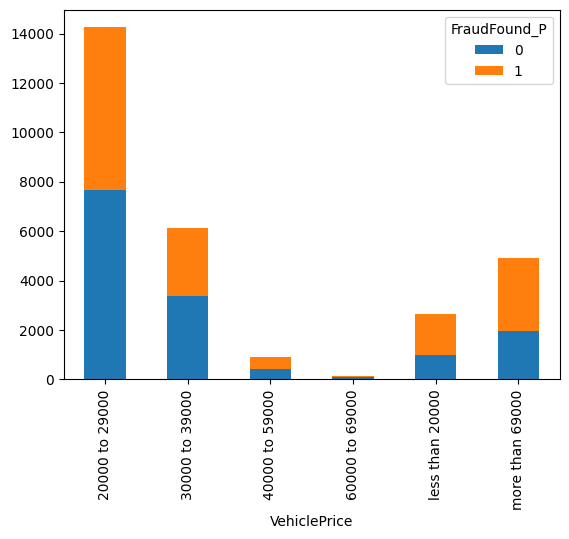

FraudFound_P             0          1
VehiclePrice                         
20000 to 29000   53.736580  46.263420
30000 to 39000   54.717289  45.282711
40000 to 59000   48.314607  51.685393
60000 to 69000   59.712230  40.287770
less than 20000  37.514167  62.485833
more than 69000  40.056818  59.943182
Chi2 value: 15.295958763970205
p-values: 0.009169848342780352
RepNumber :


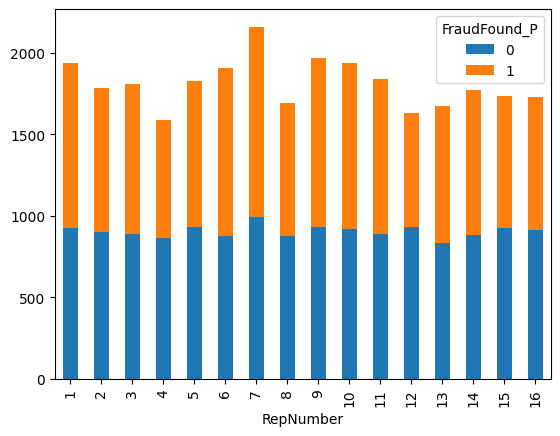

FraudFound_P          0          1
RepNumber                         
1             47.628866  52.371134
2             50.447928  49.552072
3             49.116022  50.883978
4             54.350567  45.649433
5             51.204819  48.795181
6             45.960126  54.039874
7             46.086151  53.913849
8             51.858407  48.141593
9             47.507630  52.492370
10            47.496128  52.503872
11            48.478261  51.521739
12            57.090239  42.909761
13            49.731664  50.268336
14            49.943503  50.056497
15            53.460208  46.539792
16            52.801849  47.198151
Chi2 value: 5.856805761023054
p-values: 0.9820539092027419
Deductible :


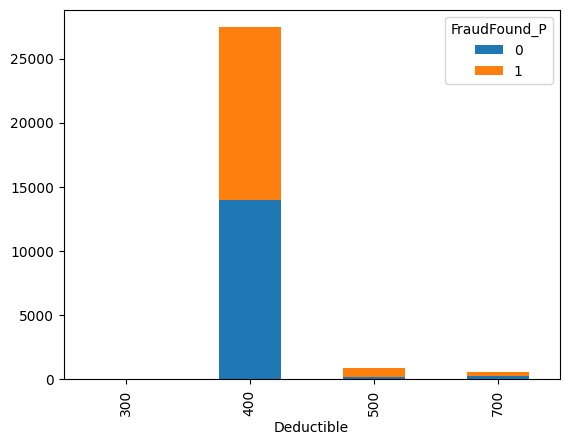

FraudFound_P          0          1
Deductible                        
300           16.216216  83.783784
400           50.975316  49.024684
500           23.225806  76.774194
700           48.996656  51.003344
Chi2 value: 41.50886388518229
p-values: 5.10015790667722e-09
DriverRating :


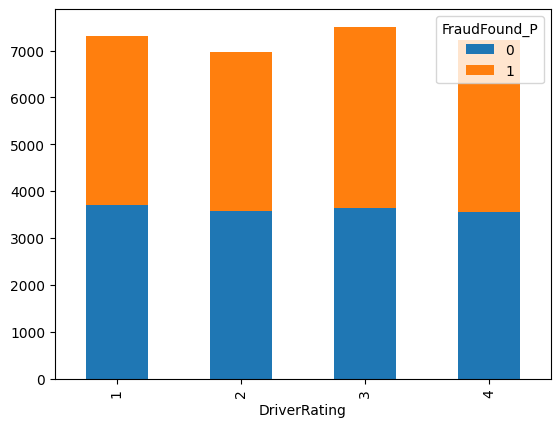

FraudFound_P          0          1
DriverRating                      
1             50.814511  49.185489
2             51.500790  48.499210
3             48.527648  51.472352
4             49.258900  50.741100
Chi2 value: 0.22521018935254716
p-values: 0.9734204257921667
Days_Policy_Accident :


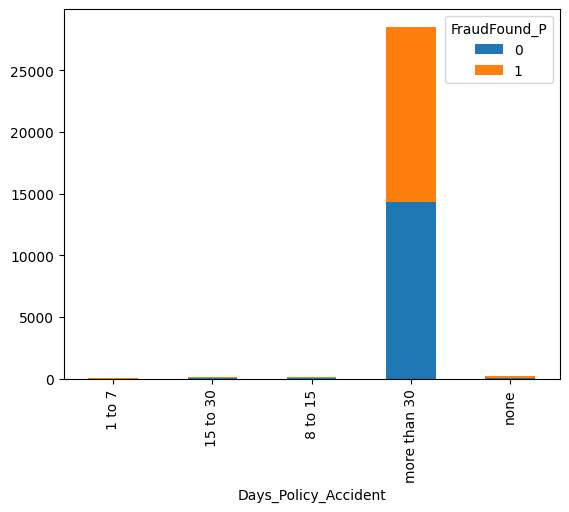

FraudFound_P                  0          1
Days_Policy_Accident                      
1 to 7                46.428571  53.571429
15 to 30              46.938776  53.061224
8 to 15               37.313433  62.686567
more than 30          50.252295  49.747705
none                  23.711340  76.288660
Chi2 value: 19.142317706058886
p-values: 0.0007369213240447156
Days_Policy_Claim :


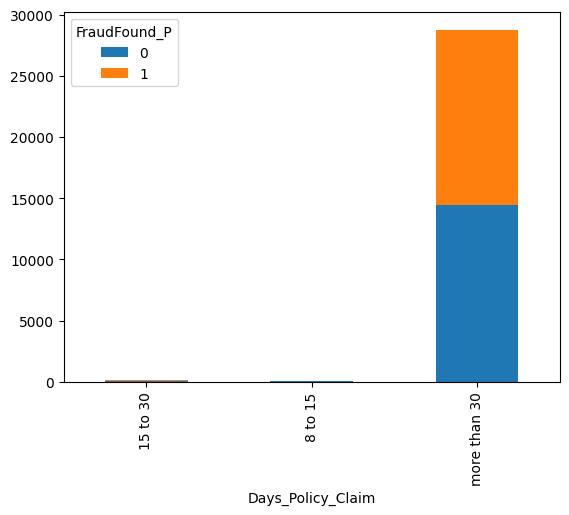

FraudFound_P               0          1
Days_Policy_Claim                      
15 to 30           32.258065  67.741935
8 to 15            25.714286  74.285714
more than 30       50.154691  49.845309
Chi2 value: 13.888171668493671
p-values: 0.0009643214792513364
PastNumberOfClaims :


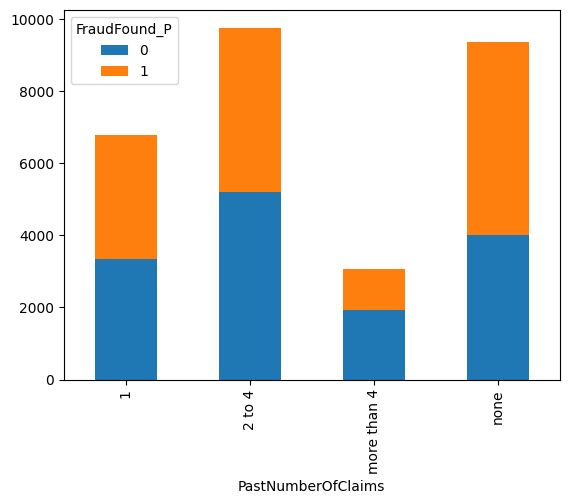

FraudFound_P                0          1
PastNumberOfClaims                      
1                   49.402919  50.597081
2 to 4              53.170132  46.829868
more than 4         63.216146  36.783854
none                42.799232  57.200768
Chi2 value: 8.755486845008798
p-values: 0.03272482239640744
AgeOfVehicle :


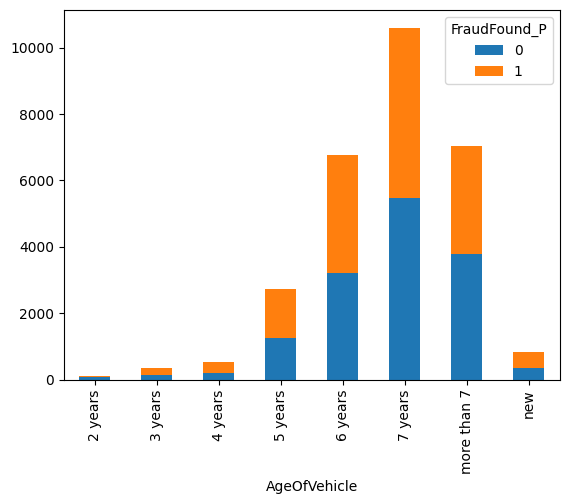

FraudFound_P          0          1
AgeOfVehicle                      
2 years       59.322034  40.677966
3 years       40.643275  59.356725
4 years       39.393939  60.606061
5 years       46.159473  53.840527
6 years       47.513649  52.486351
7 years       51.687724  48.312276
more than 7   53.584102  46.415898
new           40.380048  59.619952
Chi2 value: 14.413379927841703
p-values: 0.04429890137403857
AgeOfPolicyHolder :


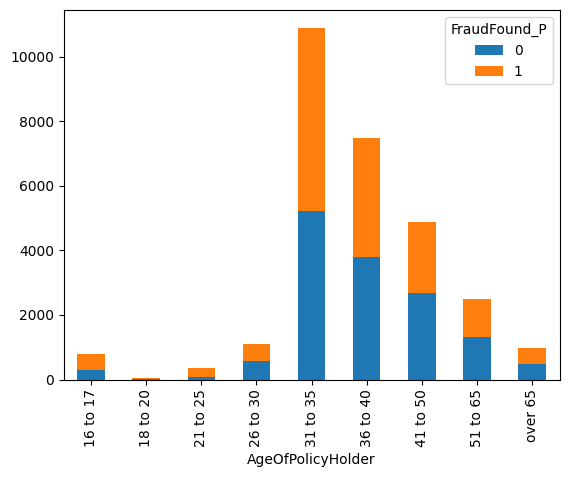

FraudFound_P               0          1
AgeOfPolicyHolder                      
16 to 17           36.970475  63.029525
18 to 20           26.530612  73.469388
21 to 25           26.210826  73.789174
26 to 30           52.346570  47.653430
31 to 35           48.031207  51.968793
36 to 40           50.861954  49.138046
41 to 50           55.146908  44.853092
51 to 65           53.113700  46.886300
over 65            49.227600  50.772400
Chi2 value: 42.07355444187169
p-values: 1.3118738216130527e-06
PoliceReportFiled :


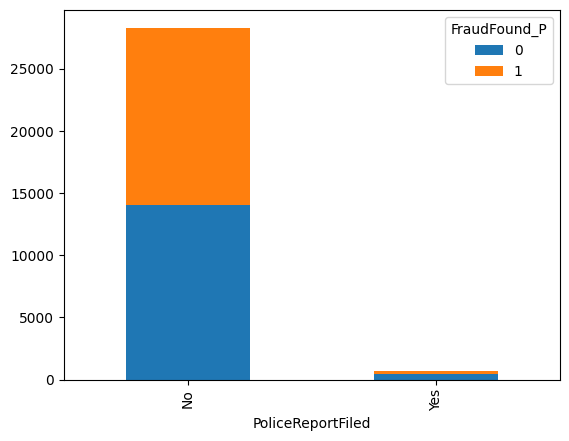

FraudFound_P               0          1
PoliceReportFiled                      
No                 49.714084  50.285916
Yes                62.235650  37.764350
Chi2 value: 2.693390016089112
p-values: 0.10076522634007262
WitnessPresent :


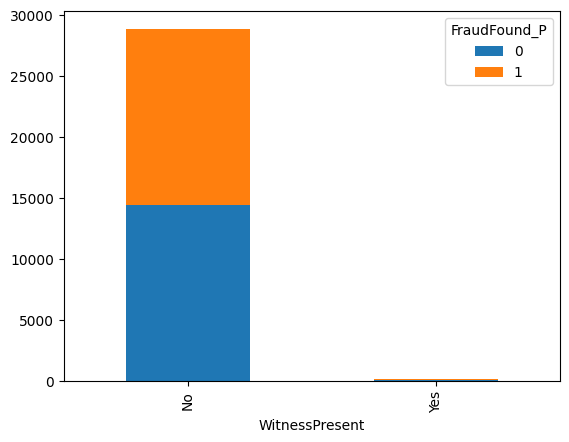

FraudFound_P            0          1
WitnessPresent                      
No              49.937630  50.062370
Yes             63.636364  36.363636
Chi2 value: 3.285696799343174
p-values: 0.06988595802239285
AgentType :


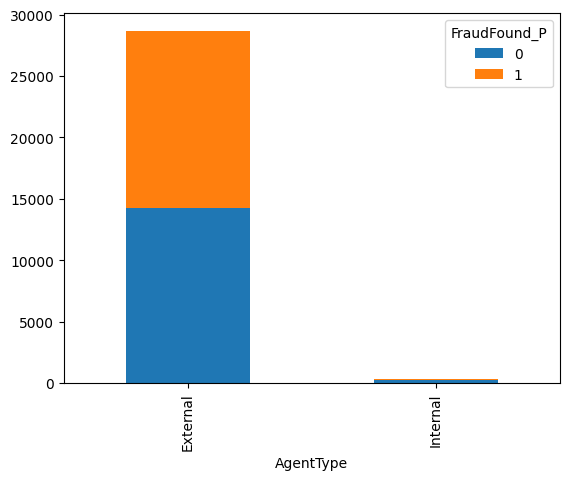

FraudFound_P          0          1
AgentType                         
External      49.734915  50.265085
Internal      73.602484  26.397516
Chi2 value: 11.060931222408014
p-values: 0.0008816585126960385
NumberOfSuppliments :


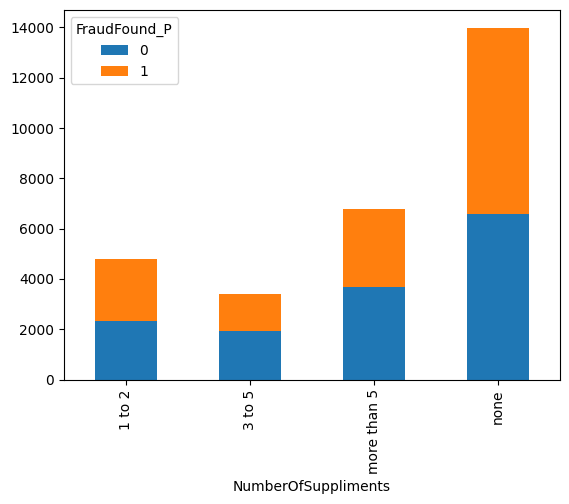

FraudFound_P                 0          1
NumberOfSuppliments                      
1 to 2               48.693835  51.306165
3 to 5               56.123940  43.876060
more than 5          54.079529  45.920471
none                 46.970563  53.029437
Chi2 value: 2.2587759504733933
p-values: 0.520464308138687
AddressChange_Claim :


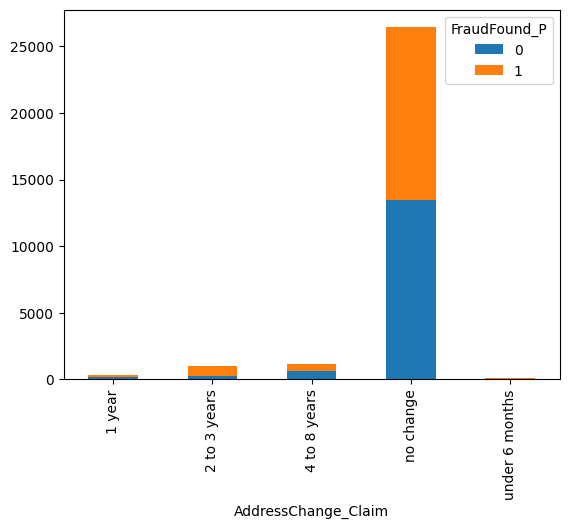

FraudFound_P                 0          1
AddressChange_Claim                      
1 year               48.036254  51.963746
2 to 3 years         23.369036  76.630964
4 to 8 years         52.687225  47.312775
no change            51.047576  48.952424
under 6 months        1.754386  98.245614
Chi2 value: 86.61178852769285
p-values: 6.9016128564946806e-18
NumberOfCars :


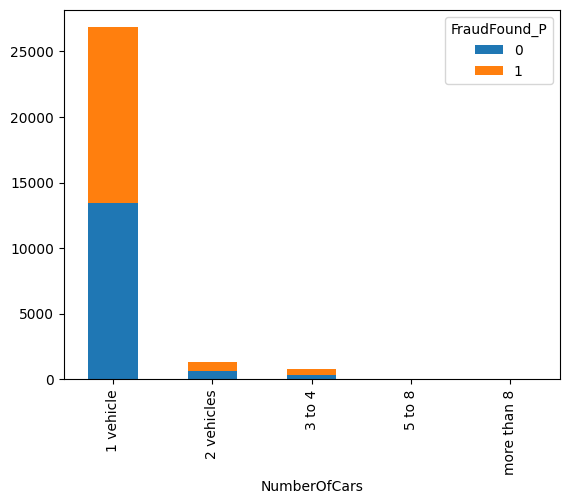

FraudFound_P           0          1
NumberOfCars                       
1 vehicle      50.206943  49.793057
2 vehicles     49.042710  50.957290
3 to 4         43.974359  56.025641
5 to 8         60.606061  39.393939
more than 8   100.000000   0.000000
Chi2 value: 86.83473434299447
p-values: 6.189133220324382e-18
Year :


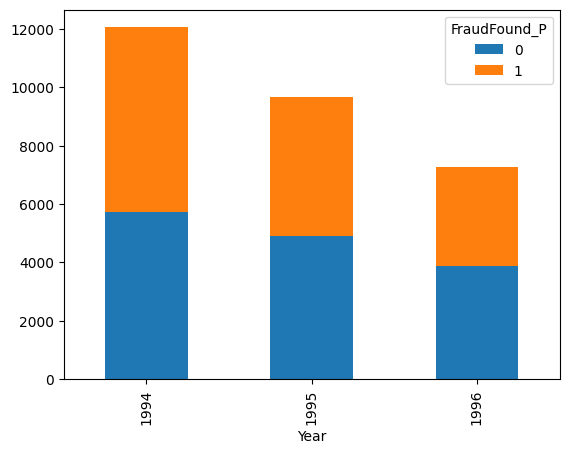

FraudFound_P          0          1
Year                              
1994          47.536905  52.463095
1995          50.620604  49.379396
1996          53.261767  46.738233
Chi2 value: 0.656845331028545
p-values: 0.7200586114350855
BasePolicy :


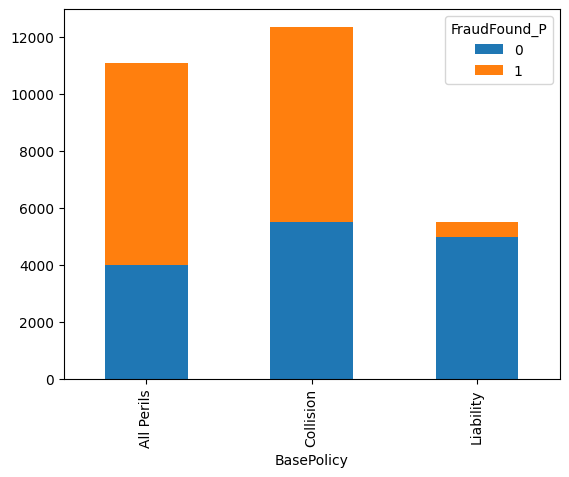

FraudFound_P          0          1
BasePolicy                        
All Perils    35.980551  64.019449
Collision     44.724065  55.275935
Liability     89.960203  10.039797
Chi2 value: 68.45333026986638
p-values: 1.3663066998258573e-15
Count:  16


In [6]:
count = 0
for name,data in equaldf.iteritems():
  if name=='Age' or name=='FraudFound_P':
    continue

  print(name,":")
  ctable = pd.crosstab(index=equaldf[name],columns=equaldf['FraudFound_P'])
  for i, row in ctable.iterrows():
    total = row[0] + row[1]  # Calculate the sum of 0s and 1s in the row
    ctable.at[i, 0] = (row[0] / total) * 100  # Calculate the percentage of 0s
    ctable.at[i, 1] = (row[1] / total) * 100  # Calculate the percentage of 1s

  # ctable.set_index(name)[[0,1]].plot(kind='bar', stacked=True)
  # plt.xlabel('Category')  # Label for the x-axis
  # plt.ylabel('Percentage')  # Label for the y-axis
  # plt.title('Percentage Contingency Table')  # Title for the plot
  # plt.show()
  equaldf.groupby([name, 'FraudFound_P']).size().unstack().plot(kind='bar', stacked=True)
  plt.show()


  print(ctable)

  chi2, p, dof, expected = chi2_contingency(ctable)
  print("Chi2 value:",chi2)
  print("p-values:",p)

  if p<=0.05:
    count += 1

print("Count: ",count)

In [7]:
df_majority = df[df['FraudFound_P'] == 0]
df_minority = df[df['FraudFound_P'] == 1]

# Oversample the minority class to match the number of majority class instances
df_minority_oversampled = df_minority.sample(n=len(df_majority), replace=True, random_state=42)

# Combine the oversampled minority class with the majority class
equaldf = pd.concat([df_majority, df_minority_oversampled])

# Shuffle the rows in the balanced DataFrame to randomize the order
equaldf = equaldf.sample(frac=1, random_state=42)

In [8]:
equaldf[['Month']] = equaldf[['Month']].replace( {
    'Jan' : 0,
    'Feb' : 1,
    'Mar' :2,
    'Apr' : 3,
    'May': 4,
    'Jun': 5,
    'Jul': 6,
    'Aug' : 7,
    'Sep': 8,
    'Oct' : 9,
    'Nov' : 10,
    'Dec' : 11
    })


equaldf[['DayOfWeek']] = equaldf[['DayOfWeek']].replace( {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday' : 6
    })


equaldf[['Make']] = equaldf[['Make']].replace( {
    'Lexus': 0,
    'Ferrari': 1,
    'Mecedes': 2,
    'Porche': 3,
    'Jaguar': 4,
    'BMW': 5,
    'Nisson': 6,
    'Saturn': 7,
    'Mercury':8,
    'Dodge' : 9,
    'Saab' : 10,
    'VW' : 11,
    'Ford': 12,
    'Accura': 13,
    'Chevrolet': 14,
    'Mazda' : 15,
    'Honda' : 16,
    'Toyota' : 17,
    'Pontiac': 18
    })

equaldf[['AccidentArea']] = equaldf[['AccidentArea']].replace( {
    'Rural' : 0,
    'Urban' : 1
    })


equaldf[['DayOfWeekClaimed']] = equaldf[['DayOfWeekClaimed']].replace( {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday' : 6
    })


equaldf[['MonthClaimed']] = equaldf[['MonthClaimed']].replace( {
    'Jan' : 0,
    'Feb' : 1,
    'Mar' :2,
    'Apr' : 3,
    'May': 4,
    'Jun': 5,
    'Jul': 6,
    'Aug' : 7,
    'Sep': 8,
    'Oct' : 9,
    'Nov' : 10,
    'Dec' : 11
    })


equaldf[['Sex']] = equaldf[['Sex']].replace( {
    'Female' : 0,
    'Male' : 1
    })


equaldf[['MaritalStatus']] = equaldf[['MaritalStatus']].replace( {
    'Widow' : 0,
    'Divorced' : 1,
    'Single' : 2,
    'Married' : 3
    })


equaldf[['Fault']] = equaldf[['Fault']].replace( {
    'Third Party' : 0,
    'Policy Holder' : 1
    })


equaldf[['PolicyType']] = equaldf[['PolicyType']].replace( {
    'Sport - Liability' : 0,
    'Sport - All Perils' : 1,
    'Utility - Liability' : 2,
    'Utility - Collision' :3,
    'Utility - All Perils' :4,
    'Sport - Collision' : 5,
    'Sedan - All Perils' : 6 ,
    'Sedan - Liability' : 7,
    'Sedan - Collision' : 8
    })


equaldf[['VehicleCategory']] = equaldf[['VehicleCategory']].replace( {
    'Utility' : 0,
    'Sport' : 1,
    'Sedan' : 2
    })


equaldf[['VehiclePrice']] = equaldf[['VehiclePrice']].replace( {
    'less than 20000' : 0,
    '20000 to 29000': 1,
    '30000 to 39000': 2,
    '40000 to 59000': 3,
    '60000 to 69000' : 4,
    'more than 69000' : 5
    })


equaldf[['Days_Policy_Accident']] = equaldf[['Days_Policy_Accident']].replace( {
    'none' : 0,
    '1 to 7' : 1,
    '8 to 15' : 2,
    '15 to 30' :3,
    'more than 30' :4
    })


equaldf[['Days_Policy_Claim']] = equaldf[['Days_Policy_Claim']].replace( {
    '8 to 15' : 0,
    '15 to 30' : 1,
    'more than 30' : 2
    })


equaldf[['PastNumberOfClaims']] = equaldf[['PastNumberOfClaims']].replace( {
    'none': 0,
    '1': 1,
    '2 to 4': 2,
    'more than 4': 3
    })


equaldf[['AgeOfVehicle']] = equaldf[['AgeOfVehicle']].replace({
    'new' : 0,
    '2 years' : 1,
    '3 years' : 2,
    '4 years' : 3,
    '5 years' : 4,
    '6 years' : 5,
    '7 years' : 6,
    'more than 7' : 7
    })


equaldf[['AgeOfPolicyHolder']] = equaldf[['AgeOfPolicyHolder']].replace({
    '18 to 20' : 0,
    '21 to 25' : 1,
    '26 to 30' : 2,
    '31 to 35' : 3,
    '36 to 40' : 4,
    '41 to 50' : 5,
    '51 to 65' : 6,
    'over 65' : 7
    })


equaldf[['PoliceReportFiled']] = equaldf[['PoliceReportFiled']].replace({
    'Yes' : 0,
    'No' : 1
    })


equaldf[['WitnessPresent']] = equaldf[['WitnessPresent']].replace({
    'Yes' : 0,
    'No' : 1
    })


equaldf[['AgentType']] = equaldf[['AgentType']].replace({
    'Internal' : 0,
    'External' : 1
    })


equaldf[['NumberOfSuppliments']] = equaldf[['NumberOfSuppliments']].replace({
    'none' : 0,
    '1 to 2' : 1,
    '3 to 5' : 2,
    'more than 5' : 3
    })


equaldf[['AddressChange_Claim']] = equaldf[['AddressChange_Claim']].replace({
    'no change' : 0,
    'under 6 months' : 1,
    '1 year' : 2,
    '2 to 3 years' : 3,
    '4 to 8 years' : 4
    })


equaldf[['NumberOfCars']] = equaldf[['NumberOfCars']].replace({
    '1 vehicle' : 0,
    '2 vehicles' : 1,
    '3 to 4' : 2,
    '5 to 8' : 3,
    'more than 8' : 4
    })


equaldf[['BasePolicy']] = equaldf[['BasePolicy']].replace({
    'All Perils' : 0,
    'Liability' : 1,
    'Collision' : 2
    })




In [9]:

equaldf.drop(columns=['AgeOfPolicyHolder'], inplace=True)
# equaldf.drop(columns=['PolicyNumber'], inplace=True)

In [10]:
columns_to_drop=["Month","WeekOfMonth","DayOfWeek","Make","DayOfWeekClaimed"   ,"MonthClaimed","WeekOfMonthClaimed","MaritalStatus","RepNumber","Days_Policy_Accident","PastNumberOfClaims","DriverRating","Days_Policy_Claim","AgeOfVehicle","WitnessPresent","NumberOfSuppliments","NumberOfCars","Year"]
equaldf=equaldf.drop(columns=columns_to_drop,axis=1)


In [11]:
equaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28992 entries, 3085 to 3549
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   AccidentArea         28992 non-null  int64
 1   Sex                  28992 non-null  int64
 2   Age                  28992 non-null  int64
 3   Fault                28992 non-null  int64
 4   PolicyType           28992 non-null  int64
 5   VehicleCategory      28992 non-null  int64
 6   VehiclePrice         28992 non-null  int64
 7   FraudFound_P         28992 non-null  int64
 8   Deductible           28992 non-null  int64
 9   PoliceReportFiled    28992 non-null  int64
 10  AgentType            28992 non-null  int64
 11  AddressChange_Claim  28992 non-null  int64
 12  BasePolicy           28992 non-null  int64
dtypes: int64(13)
memory usage: 3.1 MB


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



In [13]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder



X = equaldf.drop('FraudFound_P', axis=1)
y = equaldf['FraudFound_P']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)


knn_classifier.fit(X_train, y_train)


y_pred = knn_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 81.79%


In [14]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

auc_score = roc_auc_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred.round())
classification_rep = classification_report(y_test,y_pred.round())

print("Auc Score: ",auc_score)
print("Confusion matrix:")
print(conf_matrix)
print("Report:")
print(classification_report)

Auc Score:  0.8184011253963832
Confusion matrix:
[[2193  728]
 [ 328 2550]]
Report:
<function classification_report at 0x797bafcaa4d0>


In [15]:
import math

In [16]:
for column in equaldf.columns:
    if column != 'FraudFound_P':  # Exclude the target variable
        class_counts = equaldf.groupby([column, 'FraudFound_P']).size().unstack(fill_value=0)
        total_samples = class_counts.sum(axis=1)
        proportions = class_counts.div(total_samples, axis=0)
        entropies = -(proportions * (proportions.applymap(lambda x: math.log2(x) if x != 0 else 0))).sum(axis=1)

        print(f"Entropy for '{column}': {entropies.mean():.3f}")

Entropy for 'AccidentArea': 0.988
Entropy for 'Sex': 0.988
Entropy for 'Age': 0.910
Entropy for 'Fault': 0.759
Entropy for 'PolicyType': 0.569
Entropy for 'VehicleCategory': 0.875
Entropy for 'VehiclePrice': 0.981
Entropy for 'Deductible': 0.855
Entropy for 'PoliceReportFiled': 0.978
Entropy for 'AgentType': 0.916
Entropy for 'AddressChange_Claim': 0.782
Entropy for 'BasePolicy': 0.802


In [17]:
import pandas as pd
import math

target_column = 'FraudFound_P'

def entropy(class_counts):
    total_samples = sum(class_counts)
    proportions = [count / total_samples for count in class_counts]
    entropy = sum([-p * math.log2(p) if p != 0 else 0 for p in proportions])
    return entropy

def information_gain(data, attribute, target):
    class_counts = data[target].value_counts()
    total_entropy = entropy(class_counts)

    weighted_entropy = 0
    for value in data[attribute].unique():
        subset = data[data[attribute] == value]
        class_counts_subset = subset[target].value_counts()
        weighted_entropy += len(subset) / len(data) * entropy(class_counts_subset)

    information_gain = total_entropy - weighted_entropy
    return information_gain

information_gains = {}
for attribute in equaldf.columns:
    if attribute != 'FraudFound_P':
        gain = information_gain(equaldf, attribute, target_column)
        information_gains[attribute] = gain

# Display the information gains
for attribute, gain in information_gains.items():
    print(f'Information Gain for {attribute}: {gain:.3f}')


Information Gain for AccidentArea: 0.003
Information Gain for Sex: 0.004
Information Gain for Age: 0.025
Information Gain for Fault: 0.089
Information Gain for PolicyType: 0.131
Information Gain for VehicleCategory: 0.082
Information Gain for VehiclePrice: 0.013
Information Gain for Deductible: 0.008
Information Gain for PoliceReportFiled: 0.001
Information Gain for AgentType: 0.002
Information Gain for AddressChange_Claim: 0.010
Information Gain for BasePolicy: 0.126


In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = equaldf.drop('FraudFound_P', axis=1)
y = equaldf['FraudFound_P']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [19]:
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Display classification report
print(classification_report(y_test, predictions))

Accuracy: 82.86%
              precision    recall  f1-score   support

           0       0.94      0.70      0.80      2921
           1       0.76      0.96      0.85      2878

    accuracy                           0.83      5799
   macro avg       0.85      0.83      0.83      5799
weighted avg       0.85      0.83      0.83      5799



In [20]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(X_train)

conf_matrix = confusion_matrix(y_train, predictions)

# Calculate sensitivity (true positive rate)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])

# Calculate specificity (true negative rate)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Calculate precision
precision = conf_matrix[1, 1] / (conf_matrix[0, 1] + conf_matrix[1, 1])

print("Sensitivity (True Positive Rate): {:.2f}".format(sensitivity))
print("Specificity (True Negative Rate): {:.2f}".format(specificity))
print("Precision: {:.2f}".format(precision))

Sensitivity (True Positive Rate): 0.96
Specificity (True Negative Rate): 0.73
Precision: 0.78
